In [1]:
import gensim.models
import pandas as pd

df = pd.read_csv('./merged.csv')

In [2]:
corpus = df['lyrics'].tolist()

In [194]:
print(len(corpus))

1674


In [6]:
## 형태소 분리
contents_tokens = [Okt().morphs(sent, stem=True) for sent in corpus]
new_corpus = []

for cont in tqdm(contents_tokens):
    sentence = ''
    for word in cont:
        sentence = sentence + ' ' + word
    new_corpus.append(sentence)


100%|██████████| 1674/1674 [00:00<00:00, 24220.86it/s]


In [7]:
import numpy as np
print(np.shape(new_corpus))

(1674,)


In [8]:
print(df.head())

  artist_names  track_name                                             lyrics  \
0          IVE        I AM  다른 문을 열어, 따라갈 필요는 없어 넌 너의 길로, 난 나의 길로, mm 하루하루...   
1          IVE      Kitsch  It's our time 우린 달라, 특별한 게 좋아 Oh, what a good ...   
2        Jimin  Like Crazy  She's saying, "Baby, 생각하지 마" There's not a bad...   
3        JISOO      FLOWER  Eh-eh-eh-eh Eh-eh-eh-eh A-B-C, Do-Re-Mi 만큼 착했던...   
4     NewJeans         OMG  이 노래는 it's about you, baby Only you You, you, ...   

       r      g      b  
0   41.0   41.0   41.0  
1   41.0   41.0   41.0  
2  156.0  152.0  151.0  
3   39.0   33.0    8.0  
4  195.0  195.0  195.0  


## TF-IDF 벡터로 변환 후 여러 머신러닝 기법 비교

In [3]:
from nltk.tokenize import word_tokenize
import nltk
from tqdm import *

In [4]:
import konlpy
from konlpy.tag import Okt

In [5]:
import re
for i in range (len(corpus)):
    corpus[i] = corpus[i].replace('(', '').replace(')', '').replace(',', '').replace('-','').replace('\'', '')

In [ ]:
print(corpus[0])

In [ ]:
query = "너가 너무 그립다"

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

In [ ]:
corpus.append(query)
tfidf_matrix = tfidf.fit_transform(corpus)

In [ ]:
print(tfidf_matrix.shape)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
X = tfidf_matrix[:-1]
y = df['r']

In [ ]:
from pycaret.regression import *

optimizer = setup(X, target=y, train_size = 0.8)

In [ ]:
comp = compare_models(sort='RMSE')

In [ ]:
## 형태소 분리
contents_tokens = [Okt().morphs(sent, stem=True) for sent in corpus]
new_corpus = []

for cont in tqdm(contents_tokens):
    sentence = ''
    for word in cont:
        sentence = sentence + ' ' + word
    new_corpus.append(sentence)
    
query = "바람이 쌀쌀 부는 겨울"
tokenized_query = Okt().morphs(query, stem=True)

for word in tokenized_query:
    sentence = ''
    for word in cont:
        sentence = sentence + ' ' + word
new_corpus.append(sentence)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(new_corpus)

In [10]:
print(new_corpus[-2])

 여기다 이미 제법 겨울 이야 초록 을 감추다 roadside 아무 도 눈 이 온 걸 모르다 그 하얗다 골목 그게 많이 기억나다 Uh 기다림 은 많이 하다 맘 이 가다 곳 그렇다 건 처음 부터 너 뿐 인 걸 있다 혼자 는 그만하다 싶다 But dont know if this is what you want too So I need to know Are you down to ride ? 새벽녘 별 과 피어 난 눈꽃 이 흩날리다 곳 에 내다 달려오다 포근하다 안다 상상 하다 그 길 Would you be there for me ? 서울 은 지금 펑펑 눈 이 오다 니 가 없다 차라리 추다 게 나아 Rockabye baby 눈 뜰 때 쯤 엔 니 옆 에 있다 테 니 Now Im in my feels babe 코끝 이 찡하다 우리 추억 이 가슴 터지다 만큼 많다 머뭇거리다 시간 은 없다 when Im on ya 같이 뛰어들다 if we dont baby Im a gonner Are you down to ride ? 새벽녘 별 과 피어 난 눈꽃 이 흩날리다 곳 에 내다 달려오다 포근하다 안다 상상 하다 그 길 Would you be there for me ? Me me Would you be there for me ? Be there for me Me me Would you be there for me ? Be there for me 앨범 속 널 보고 또 보다 보다 둘 이 차다 많이 도 돌아다니다 다니다 너 만 알다 hashtag 넌 나 만의 bae 다시 넘치다 우리 만의 like like ooh Look 발 디디다 틈 없이 붐비다 명동 혼자 걷다 보다 석양 이 진 남산 아래 반짝이다 별 의 도시 Ill be there for you 약속 하다 If youre there for me 그건 이 밤 이 아름답다 이 유일 테 니 Are you down to ride ? 새벽녘 별 과 피어 난 눈꽃 이 흩날리다 곳 에 내다 달려오다 포근하다 안다 상상 하다 그 길 Would you

In [ ]:
X = tfidf_matrix[:-1]
y = df['r']
from pycaret.regression import *

optimizer = setup(X, target=y, train_size = 0.8)


In [ ]:
comp = compare_models(sort='RMSE')

In [ ]:
ada = create_model('ada', fold=5)

In [ ]:
tune = tune_model(ada, fold=5, optimize='MSE')

In [ ]:
saved = save_model(tune, './ada')

## SentenceTransformer를 이용한 회귀

In [7]:
import torch
corpus_embeddings = torch.load("sbert_embeddings.pt")

In [8]:
X = corpus_embeddings
y = df[['r', 'g', 'b']]

In [11]:
pip install pycaret

  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pyod-2.0.2-py3-none-any.whl
  Using cached category_encoders-2.6.4-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached lightgbm-4.5.0-py3-none-macosx_12_0_arm64.whl.metadata (17 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl.metadata (4.6 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
  Using cached kaleido-0.2.1-py2.py3-none-macosx_11_0_arm64.whl.metadata (15 kB)
  Using cached schemdraw-0.15-py3-none-any.whl.metadata (2.2 kB)
  Using cached plotly_resampler-0.10.0-py3-none-any.whl.metadata (13 kB)
  Using cached sktime-0.26.0-py3-none-any.whl.metadata (29 kB)
  Using cached tbats-1.1.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached scikit_base-0.7.8-py3-none-any.whl.metadata (8.8 kB)
  Using cached dash-2.18.2-py3-none-any.whl.metadata (10 

In [13]:
pip install scikit-learn==1.4.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 10.0 MB/s eta 0:00:00 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.3.2 requires scikit-learn>1.4.0, but you have scikit-learn 1.4.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [9]:
from pycaret.regression import *
optimizer = setup(X, target=y, train_size = 0.8)

,Description,Value
0,Session id,4193
1,Target,feature_768
2,Target type,Regression
3,Original data shape,"(1674, 768)"
4,Transformed data shape,"(1674, 768)"
5,Transformed train set shape,"(1339, 768)"
6,Transformed test set shape,"(335, 768)"
7,Numeric features,767
8,Preprocess,True
9,Imputation type,simple


In [10]:
comp = compare_models(sort='RMSE')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:36:28
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:36:28
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Bayesian Ridge


KeyboardInterrupt: 

In [ ]:
en = create_model('en', fold=10)

In [ ]:
en_tune = tune_model(en, fold=10, optimize='RMSE')

In [ ]:
saved_en = save_model(en_tune, './en_sent')

In [ ]:
load_en = load_model('./en_sent')
load_en['trained_model']

## sentencetransformer로 임베딩된 벡터로 딥러닝

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

In [ ]:
print(torch.__version__)

In [ ]:
import torch
print(f"MPS 장치를 지원하도록 build가 되었는가? {torch.backends.mps.is_built()}")
print(f"MPS 장치가 사용 가능한가? {torch.backends.mps.is_available()}") 

## 사전 학습된 word2vec을 불러와 lstm으로 학습

In [ ]:
ko_model = ('ko.bin')

In [11]:
import gensim

In [12]:
ko_model = gensim.models.Word2Vec.load('./ko.bin')

In [ ]:
print(len(ko_model.wv.vocab))

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = new_corpus
y = df[['r', 'g', 'b']]

In [15]:
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)

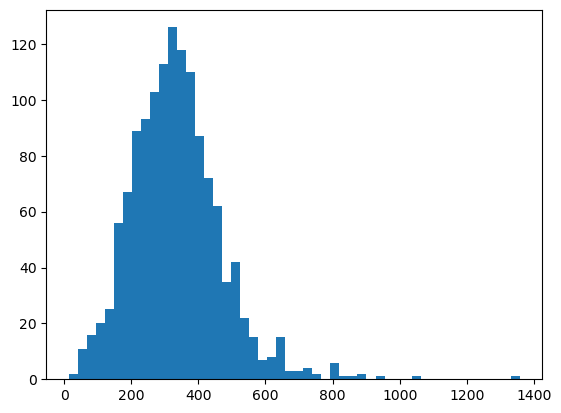

In [24]:
import matplotlib.pyplot as plt

plt.hist([len(sample) for sample in X_train], bins=50)
plt.show()

In [25]:
print(sum(map(len, X_train))/len(X_train))

334.3383121732636


In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [26]:
max_len = 334
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (349,) + inhomogeneous part.

In [31]:
def pad_sequences_manual(sequences, maxlen=None):
    padded_sequences = []
    for seq in sequences:
        if len(seq) > maxlen:
            seq = seq[:maxlen]
        elif len(seq) < maxlen:
            padding_length = maxlen - len(seq)
            seq = seq + "0" * padding_length
        padded_sequences.append(seq)
    return padded_sequences

In [32]:
X_train = pad_sequences_manual(X_train, max_len)
X_test = pad_sequences_manual(X_test, max_len)

In [33]:
import tensorflow

In [34]:
earlystop_callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [35]:
vocab_size = 30185
hidden_units = 128
num_output = 3
embedding_dim = 128

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(128))
model.add(LSTM(64))
model.add(Dense(num_output))

/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [20]:
def token_to_idx(doc, unk_idx):
    idx_list = []
    for token in doc.split(' '):
        if token == '0':
            idx_list.append(0)
            continue
        try:
            idx_list.append(ko_model.wv[token])
        except:
            idx_list.append(unk_idx)
    return idx_list

In [21]:
for i in range(len(X_train)):
    X_train[i] = token_to_idx(X_train[i], 0)
for i in range(len(X_test)):
    X_test[i] = token_to_idx(X_test[i], 0)

KeyError: 0

In [45]:
print(len(X_train[3]))

82


In [32]:
print(len(X_train[-1]))

196


In [36]:
from tensorflow.keras.optimizers import Adam

In [37]:
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mse'])

In [ ]:
model.fit(X_train, y_train, epochs=1, batch_size=64, validation_data=(X_test, y_test), verbose=1, callbacks=[earlystop_callback])